In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from torchinfo import summary
from torchviz import make_dot

In [2]:
l3 = nn.Linear(2, 3)

In [3]:
torch.manual_seed(123)
l1 = nn.Linear(1, 1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [4]:
for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [5]:
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [6]:
x_np = np.arange(-2, 2.1, 1)
x = torch.tensor(x_np).float()
x = x.view(-1, 1)
print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [7]:
y = l1(x)
print(y.shape)
print(y)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]], grad_fn=<AddmmBackward>)


In [8]:
l2 = nn.Linear(2, 1)
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [9]:
x2_np = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [10]:
y2 = l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [11]:
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [12]:
y3 = l3(x2)
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


In [13]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [14]:
inputs = torch.ones(100, 1)

n_input = 1
n_output = 1
net = Net(n_input, n_output)

outputs = net(inputs)

In [15]:
from sklearn.datasets import load_boston

In [16]:
boston = load_boston()

x_org, yt = boston.data, boston.target
feature_names = boston.feature_names

print('元データ: ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ:  (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/home/docker/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [17]:
x = x_org[:, feature_names == 'RM']
print('絞り込み後: ', x.shape)
print(x[:5, :])
print('正解データ')
print(yt[:5])

絞り込み後:  (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


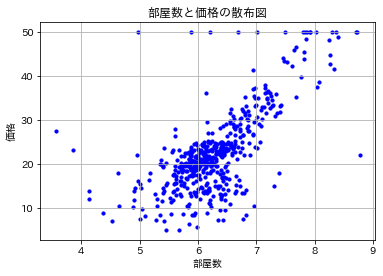

In [18]:
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.grid()
plt.show()

In [19]:
n_input = x.shape[1]
n_output = 1
print(f'入力次元数: {n_input}, 出力次元数: {n_output}')

入力次元数: 1, 出力次元数: 1


In [20]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_output)

        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [21]:
net = Net(n_input, n_output)

In [22]:
for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [23]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [24]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [25]:
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      --                        --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [26]:
criterion = nn.MSELoss()

lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [27]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()
print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [28]:
labels1 = labels.view((-1, 1))
print(labels1.shape)

torch.Size([506, 1])


In [29]:
net.to('cpu')
outputs = net(inputs)

In [30]:
loss = criterion(outputs, labels1)
print(f'{loss.item():.5f}')

308.44986


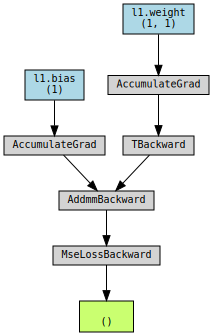

In [31]:
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [32]:
outputs = net(inputs)
loss = criterion(outputs, labels1)

loss.backward()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [33]:
optimizer.step()
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [34]:
optimizer.zero_grad()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[0.]])
tensor([0.])


In [35]:
lr = 0.01
net = Net(n_input, n_output).to('cpu')
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 2))

In [36]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch: {epoch}, loss: {loss.item():.5f}')

Epoch: 0, loss: 154.22493
Epoch: 100, loss: 29.61752
Epoch: 200, loss: 29.43177
Epoch: 300, loss: 29.25043
Epoch: 400, loss: 29.07340
Epoch: 500, loss: 28.90057
Epoch: 600, loss: 28.73186
Epoch: 700, loss: 28.56715
Epoch: 800, loss: 28.40636
Epoch: 900, loss: 28.24939
Epoch: 1000, loss: 28.09615
Epoch: 1100, loss: 27.94655
Epoch: 1200, loss: 27.80050
Epoch: 1300, loss: 27.65792
Epoch: 1400, loss: 27.51873
Epoch: 1500, loss: 27.38285
Epoch: 1600, loss: 27.25020
Epoch: 1700, loss: 27.12070
Epoch: 1800, loss: 26.99428
Epoch: 1900, loss: 26.87086
Epoch: 2000, loss: 26.75037
Epoch: 2100, loss: 26.63275
Epoch: 2200, loss: 26.51792
Epoch: 2300, loss: 26.40582
Epoch: 2400, loss: 26.29639
Epoch: 2500, loss: 26.18955
Epoch: 2600, loss: 26.08525
Epoch: 2700, loss: 25.98343
Epoch: 2800, loss: 25.88404
Epoch: 2900, loss: 25.78700
Epoch: 3000, loss: 25.69226
Epoch: 3100, loss: 25.59978
Epoch: 3200, loss: 25.50950
Epoch: 3300, loss: 25.42136
Epoch: 3400, loss: 25.33532
Epoch: 3500, loss: 25.25132
Epo

In [37]:
print(f'損失初期値: {history[0, 1]:.5f}')
print(f'損失最終値: {history[-1, 1]:.5f}')

損失初期値: 154.22493
損失最終値: 21.80033


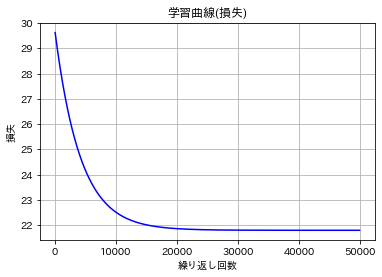

In [38]:
plt.plot(history[1:, 0], history[1:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid()
plt.show()

In [39]:
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2188644]
 [45.212074 ]]


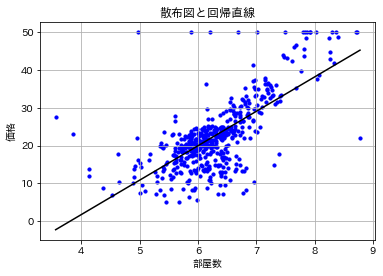

In [40]:
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.grid()
plt.show()

In [41]:
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [49]:
n_input = x2.shape[1]
print(n_input)

net = Net(n_input, n_output).to('cpu')

2


In [43]:
for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1., 1.]])
変数名: l1.bias
変数値: tensor([1.])


In [44]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [45]:
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      --                        --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [46]:
inputs = torch.tensor(x2).float()

In [52]:
lr = 0.01
net = Net(n_input, n_output).to('cpu')
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 50000
history = np.zeros((0, 2))

In [53]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch: {epoch}, loss: {loss.item():.5f}')

Epoch: 0, loss: 112.06398
Epoch: 100, loss: 3753837073642659568666615480320.00000
Epoch: 200, loss: inf
Epoch: 300, loss: nan
Epoch: 400, loss: nan
Epoch: 500, loss: nan
Epoch: 600, loss: nan
Epoch: 700, loss: nan
Epoch: 800, loss: nan
Epoch: 900, loss: nan
Epoch: 1000, loss: nan
Epoch: 1100, loss: nan
Epoch: 1200, loss: nan
Epoch: 1300, loss: nan
Epoch: 1400, loss: nan
Epoch: 1500, loss: nan
Epoch: 1600, loss: nan
Epoch: 1700, loss: nan
Epoch: 1800, loss: nan
Epoch: 1900, loss: nan
Epoch: 2000, loss: nan
Epoch: 2100, loss: nan
Epoch: 2200, loss: nan
Epoch: 2300, loss: nan
Epoch: 2400, loss: nan
Epoch: 2500, loss: nan
Epoch: 2600, loss: nan
Epoch: 2700, loss: nan
Epoch: 2800, loss: nan
Epoch: 2900, loss: nan
Epoch: 3000, loss: nan
Epoch: 3100, loss: nan
Epoch: 3200, loss: nan
Epoch: 3300, loss: nan
Epoch: 3400, loss: nan
Epoch: 3500, loss: nan
Epoch: 3600, loss: nan
Epoch: 3700, loss: nan
Epoch: 3800, loss: nan
Epoch: 3900, loss: nan
Epoch: 4000, loss: nan
Epoch: 4100, loss: nan
Epoch:

In [55]:
num_epochs = 2000
lr = 0.001
net = Net(n_input, n_output).to('cpu')
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 2))

In [56]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels1) / 2.0

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch: {epoch}, loss: {loss.item():.5f}')

Epoch: 0, loss: 112.06398
Epoch: 100, loss: 25.35892
Epoch: 200, loss: 16.39105
Epoch: 300, loss: 15.40301
Epoch: 400, loss: 15.29414
Epoch: 500, loss: 15.28211
Epoch: 600, loss: 15.28076
Epoch: 700, loss: 15.28059
Epoch: 800, loss: 15.28054
Epoch: 900, loss: 15.28051
Epoch: 1000, loss: 15.28048
Epoch: 1100, loss: 15.28046
Epoch: 1200, loss: 15.28043
Epoch: 1300, loss: 15.28040
Epoch: 1400, loss: 15.28037
Epoch: 1500, loss: 15.28034
Epoch: 1600, loss: 15.28031
Epoch: 1700, loss: 15.28028
Epoch: 1800, loss: 15.28026
Epoch: 1900, loss: 15.28023


In [57]:
print(f'損失初期値: {history[0, 1]:.5f}')
print(f'損失最終値: {history[-1, 1]:.5f}')

損失初期値: 112.06398
損失最終値: 15.28023


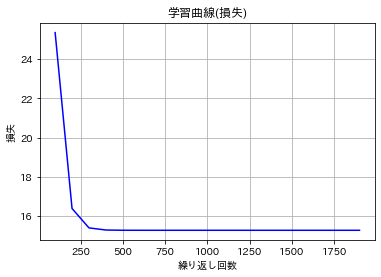

In [58]:
plt.plot(history[1:, 0], history[1:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid()
plt.show()